In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Train e Test - Pré-processamento**

In [ ]:
#Treino:
dfTrain=pd.read_csv('/content/train.csv')
#Test:
dfTest=pd.read_csv('/content/test.csv')

In [ ]:
dfTrain.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
dfTest.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
print ("Linhas: " , dfTrain.shape[0])
print ("Colunas: " , dfTrain.shape[1])
print ("\nAtributos : \n" , dfTrain.columns.tolist())
print ("\nValores faltantes :  ", dfTrain.isnull().sum().values.sum())
print ("\nValores únicos :  \n",dfTrain.nunique())

Linhas:  103904
Colunas:  25

Atributos : 
 ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

Valores faltantes :   310

Valores únicos :  
 Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient      

In [ ]:
print ("Linhas: " , dfTest.shape[0])
print ("Colunas: " , dfTest.shape[1])
print ("\nAtributos : \n" , dfTest.columns.tolist())
print ("\nValores faltantes :  ", dfTest.isnull().sum().values.sum())
print ("\nValores únicos :  \n",dfTest.nunique())

Linhas:  25976
Colunas:  25

Atributos : 
 ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

Valores faltantes :   83

Valores únicos :  
 Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of

In [ ]:
dfTrain=dfTrain.drop(columns=['id', 'Unnamed: 0'],axis=1)

In [ ]:
dfTest=dfTest.drop(columns=['id', 'Unnamed: 0'],axis=1)

In [ ]:
dfTrain[dfTrain.isnull().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [ ]:
dfTest[dfTest.isnull().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
24133,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,...,4,3,3,5,5,4,4,0,NaN,satisfied
25128,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

dfTrain['Arrival Delay in Minutes'] = imputer.fit_transform(dfTrain['Arrival Delay in Minutes'].values.reshape(-1,1))[:,0]

In [ ]:
dfTest['Arrival Delay in Minutes'] = imputer.fit_transform(dfTest['Arrival Delay in Minutes'].values.reshape(-1,1))[:,0]

In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dfTrain[["Gender","Customer Type", "Type of Travel", "satisfaction"]] = \
dfTrain[["Gender","Customer Type", "Type of Travel", "satisfaction"]].apply(labelencoder.fit_transform)

In [ ]:
dfTest[["Gender","Customer Type", "Type of Travel", "satisfaction"]] = \
dfTest[["Gender","Customer Type", "Type of Travel", "satisfaction"]].apply(labelencoder.fit_transform)

In [ ]:
dfTrain = pd.get_dummies(data=dfTrain, columns=['Class'])

In [ ]:
dfTest = pd.get_dummies(data=dfTest, columns=['Class'])

In [ ]:
dfTrain.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0


In [ ]:
dfTest.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,0,0,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1,0,0
2,1,1,20,0,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0,1,0
3,1,0,44,0,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1,0,0
4,0,0,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,1,0


In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  int64  
 11  Seat comfort                       1039

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Flight Distance                    25976 non-null  int64  
 5   Inflight wifi service              25976 non-null  int64  
 6   Departure/Arrival time convenient  25976 non-null  int64  
 7   Ease of Online booking             25976 non-null  int64  
 8   Gate location                      25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Online boarding                    25976 non-null  int64  
 11  Seat comfort                       25976 non-null  int

In [ ]:
listColumnsTrain = []
a = list(dfTrain.nunique())
for cont, i in enumerate(dfTrain.columns):
  if a[cont] > 2:
    listColumnsTrain.append(i)

In [ ]:
listColumnsTest = []
a = list(dfTest.nunique())
for cont, i in enumerate(dfTest.columns):
  if a[cont] > 2:
    listColumnsTest.append(i)

In [ ]:
std=StandardScaler()
scaled = std.fit_transform(dfTrain[listColumnsTrain])
scaled = pd.DataFrame(scaled,columns=listColumnsTrain)
dfTrain=dfTrain.drop(columns=listColumnsTrain,axis=1)

In [ ]:
dfTrain=dfTrain.merge(scaled, left_index=True, right_index=True, how = "left")

In [ ]:
std=StandardScaler()
scaled = std.fit_transform(dfTest[listColumnsTest])
scaled = pd.DataFrame(scaled,columns=listColumnsTest)
dfTest=dfTest.drop(columns=listColumnsTest,axis=1)

In [ ]:
dfTest=dfTest.merge(scaled, left_index=True, right_index=True, how = "left")

In [ ]:
dfTrain.head()

,Gender,Customer Type,Type of Travel,satisfaction,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Inflight wifi service,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,0,0,0,1,-1.745279,-0.731539,0.203579,...,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.073014
1,1,1,0,0,1,0,0,-0.951360,-0.957184,0.203579,...,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.237539
2,0,0,0,1,1,0,0,-0.885200,-0.047584,-0.549533,...,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.392816
3,0,0,0,0,1,0,0,-0.951360,-0.629246,-0.549533,...,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.159901
4,1,0,0,1,1,0,0,1.430397,-0.978244,0.203579,...,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.392816


In [ ]:
dfTest.head()

,Gender,Customer Type,Type of Travel,satisfaction,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Inflight wifi service,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,1,0,0.817887,-1.035171,1.703853,...,-0.340303,1.227138,1.259170,1.250974,1.161716,-1.035348,1.144063,1.298998,0.953810,0.781143
1,0,0,0,1,1,0,0,-0.239238,1.671443,-1.291598,...,1.174774,0.479907,0.479178,0.492730,0.311739,-0.247517,0.297077,1.298998,-0.382286,-0.393543
2,1,1,0,0,0,1,0,-1.296363,-1.003128,-0.542735,...,-1.097842,-1.014556,0.479178,-1.782001,-0.538238,-1.035348,-1.396893,-0.974927,-0.382286,-0.393543
3,1,0,0,1,1,0,0,0.289325,2.186131,-2.040460,...,0.417235,-1.761787,-1.860800,-1.782001,-2.238193,-0.247517,-2.243878,0.541023,-0.382286,-0.233358
4,0,0,0,1,0,1,0,0.619676,-0.011804,-0.542735,...,-1.097842,-1.014556,-1.080807,-1.023758,-1.388216,0.540315,-1.396893,0.541023,-0.382286,0.140405


**Train e Test - Seleção de características e acuracidade entre o conjunto treino e teste**

In [ ]:
X_train = dfTrain.drop(columns='satisfaction', axis=1).values
y_train = dfTrain['satisfaction'].values

In [ ]:
X_test = dfTest.drop(columns='satisfaction', axis=1).values
y_test = dfTest['satisfaction'].values

In [ ]:
forest = RandomForestClassifier(n_estimators = 10)
#==
forest.fit(X_train, y_train)
#==
#Score
#==
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.996621881736988
Testing Score 
 0.9576917154296274
[[14246   327]
 [  772 10631]]


In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(forest, step=1)
selector = selector.fit(X_train, y_train)

#Armazena a nova dimensão do vetor de características
features = selector.fit_transform(X_train,y_train)

#Instancia um DecisionTreeClassifier
y_pred = selector.predict(X_test)

print(selector.ranking_)
print(selector.get_support(indices=True))

#Gera score baseado na acurácia
acc = round(accuracy_score(y_test,y_pred)*100,2)
print(acc)

[12  2  1  1  1 13  1  1  1  9  1  5 11  1  1  1  3  1  1  4  6  7 10  8]
[ 2  3  4  6  7  8 10 13 14 15 17 18]
94.47


In [ ]:
cols = pd.Series(selector.support_,index = dfTrain.drop(columns='satisfaction', axis=1).columns)
wrapper = cols[cols==True].index
print(wrapper)

Index(['Type of Travel', 'Class_Business', 'Class_Eco', 'Age',
       'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'Leg room service', 'Baggage handling'],
      dtype='object')


In [ ]:
#Deixa no formato list
featuresList = wrapper.tolist()

Feature Type of Travel - score 0.12540
Feature Class_Business - score 0.05524
Feature Class_Eco - score 0.07335
Feature Age - score 0.06314
Feature Flight Distance - score 0.06982
Feature Inflight wifi service - score 0.14220
Feature Ease of Online booking - score 0.04797
Feature Online boarding - score 0.23699
Feature Seat comfort - score 0.03701
Feature Inflight entertainment - score 0.06966
Feature Leg room service - score 0.04172
Feature Baggage handling - score 0.03750


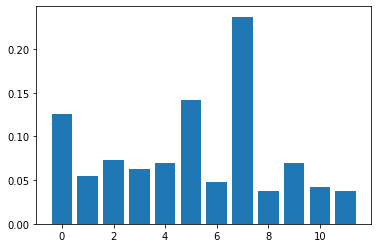

In [ ]:
from matplotlib import pyplot

forest = RandomForestClassifier(n_estimators = 10)
forest.fit(features, y_train)

importance = forest.feature_importances_
for i,v in enumerate(importance):
    print('Feature %s - score %.5f' % (featuresList[i], v) )

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Portanto, a diferença de acuracidade entre teste e treino foi de aproximadamente 0,04 (4%), juntamente a isso podemos perceber que houve uma leve difereneça com a utilização da feature importance, que deixou o modelo com metade da quantidade original de features e o simplificando, porém reduzindo em aproximadamente 0,01 (1%) a sua acuracidade comparada ao modelo de teste.